[48, 2, 24, 93, 66, 20, 38]
[48, 2, 24, 93, 66, 20, 38]
[30, 41, 52, 63, 64]
[78, 67, 56, 55, 64]
[19, 18, 7, 6, 5, 4, 13, 2, 11]
[57, 46, 37]
[91, 80, 71, 62, 63]
[15, 4, 13]
[91, 92]
[68, 57, 46, 35, 26, 15, 4]
[86, 95, 94]
[47, 37, 26, 17]
[0.0021504530013771728, 0.0007604919992445502, 0.0011569879989110632, 0.002507265999156516, 0.001870612999482546, 0.0006164679998619249, 0.00020149800002400298, 0.0022103209994384088, 0.0025722649988892954, 0.0004231809998600511]
0.0014469544996245532
[0.008612759000243386, 0.008206684000469977, 0.007839951000278234, 0.008104738000838552, 0.00928054200085171, 0.008683231999384589, 0.007777688999340171, 0.007858082000893774, 0.00803323900072428, 0.008962044999861973]
0.008335896100288665
[0.00018712999917624984, 0.00021826100055477582, 0.0003995749993919162, 0.00011152499973832164, 0.0001330780014541233, 6.739399941579904e-05, 5.918400165683124e-05, 0.0003465490008238703, 5.405199954111595e-05, 0.0002442599998175865]
0.00018210080015705897


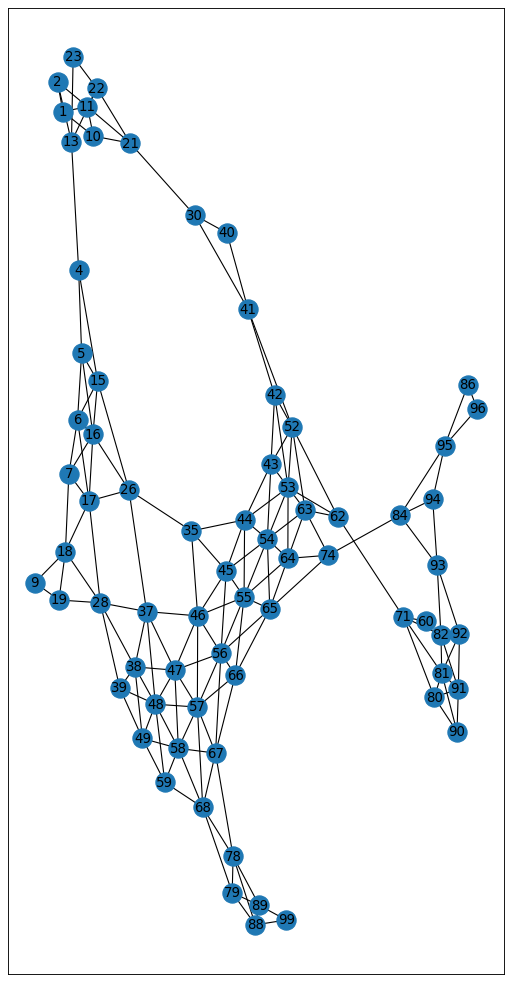

In [37]:
"""Algorithms. Task_6, Konstantin Bestuzhev, C4132"""
"""Algorithms on graphs. Pathes on weighted graphs."""


import random
import math
import time
import networkx as nx
import matplotlib.pyplot as plt


"""Part 1. Comparison of Diikstra and Bellman-Ford algorithms."""


"""Creating random-weighted graph of 'networx' library type"""

"""Graph parameters"""
vertices = 100
edges = 2000
min_weight = 1
max_weight = 100


"""Create random list with all significant adjacency matrix elements"""
def signifcant_elements(vertices, edges):
    if(edges > vertices*(vertices-1)//2):    # Impossible case
        return None
    else:
        elements = [0 for i in range((vertices*(vertices-1)//2-edges))]
        elements+=[random.randint(min_weight, max_weight) for j in range(edges)]
        random.shuffle(elements)
        return(elements)

"""Generate random adjacency matrix"""
def adjacency_matrix(vertices=vertices, edges=edges):
    if(vertices == 0):
        return []
    else:
        matrix = [[0 for i in range(vertices)] for j in range(vertices)]
        elements = signifcant_elements(vertices, edges)
        curr_line = 0
        curr_row = 1
        for element in elements:    # Symmetrical fill of adjacency matrix
            matrix[curr_line][curr_row] = element
            matrix[curr_row][curr_line] = element
            if(curr_row < len(matrix)-1):
                curr_row+=1
            else:
                curr_line+=1
                curr_row = curr_line+1
    return matrix

"""Create networkx weighted graph based on adjacency matrix"""
def create_graph(adjacency_matrix):
    G = nx.Graph()
    for i in range(len(adjacency_matrix)):
        G.add_node(i)
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if(adjacency_matrix[i][j] != 0):    # Check for edges
                G.add_edge(i, j, weight = adjacency_matrix[i][j])
    return G


"""Part 2. The A-star algorithm on the cell grid"""


"""Parameters of cell grid"""
cells = 100    # quantity of all cell grid tiles in the field
obstacles = 30    # quantity of impassable tiles


"""Create a square matrix representing cell grid"""
def cell_grid_matrix(elements=cells):
    if(math.sqrt(elements)%1 != 0):
        print("Tiles quantity must have integer square!")
        return(None)
    dimension = int(math.sqrt(elements))
    matrix = [[j*dimension+i for i in range(dimension)]
            for j in range(dimension)]
    return(matrix)

"""Create cell grid (graph-represented)"""
def cell_grid(cells=cells, obstacles=obstacles):
    matrix = cell_grid_matrix(cells)
    G = nx.Graph()
    for row in matrix:
        for element in row:
            G.add_node(element)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if(i < len(matrix)-1):
                G.add_edge(matrix[i][j], matrix[i+1][j])
                if(j > 0):
                    G.add_edge(matrix[i][j], matrix[i+1][j-1])
                if(j < len(matrix[i])-1):
                    G.add_edge(matrix[i][j], matrix[i+1][j+1])
                    G.add_edge(matrix[i][j], matrix[i][j+1])
            else:
                if(j < len(matrix[i])-1):
                    G.add_edge(matrix[i][j], matrix[i][j+1])
    sequence = [i for i in range(cells)]
    random.shuffle(sequence)
    for i in range(obstacles):
        G.remove_node(sequence[i])
    return(G)


"""Speedup-tests of algorithms on both graphs"""


iterations = 10    # Make speed-tests 'iterations' times


graph_1 = create_graph(adjacency_matrix(vertices, edges))
nodes_list_1 = []
for node in graph_1.nodes:
    nodes_list_1.append(node)
graph_2 = cell_grid(cells, obstacles)
nodes_list_2 = []
for node in graph_2.nodes:
    nodes_list_2.append(node)

def execution_times(iterations=iterations):
    results = {'dijkstra': [], 'bellman_ford': [], 'A-star': []}
    for i in range(iterations):    # Measurement of executabale time
        start_1 = random.choice(nodes_list_1)
        end_1 = random.choice(nodes_list_1)
        before=time.perf_counter()
        path_1 = nx.dijkstra_path(graph_1, start_1, end_1)
        after=time.perf_counter()
        results['dijkstra'].append(after-before)
        before=time.perf_counter()
        path_2 = nx.bellman_ford_path(graph_1, start_1, end_1)
        after=time.perf_counter()
        results['bellman_ford'].append(after-before)
        before=time.perf_counter()
        path_3 = nx.astar_path(graph_2, random.choice(nodes_list_2),
                     random.choice(nodes_list_2))
        after=time.perf_counter()
        results['A-star'].append(after-before)
        if(i == 0):
            print(path_1)
            print(path_2)
        print(path_3)
    return(results)


results = execution_times(iterations)
print(results['dijkstra'])
print(sum(results['dijkstra'])/iterations)
print(results['bellman_ford'])
print(sum(results['bellman_ford'])/iterations)
print(results['A-star'])
print(sum(results['A-star'])/iterations)
fig = plt.figure(figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx(graph_2)
plt.savefig('A:\Information\Kostya\Master\Graph.png')
